# Exploring map projections

Intro text...
We'll start by importing some mapping libraries. Here we are using Cartopy, although other mapping libraries (such as Basemap) exist:

In [1]:
import matplotlib.pyplot as plt  # Matplotlib plotting library
import cartopy.crs as ccrs       # "crs" is "coordinate reference system"

import warnings
warnings.filterwarnings(action='ignore') # Cartopy emits warnings that aren't useful here

## Projection types

It is not possible to completely avoid distortion but projections can preserve different attributes:

 * **Equal-area**: preserves the relative areas of shapes
 * **Conformal**: preserves (small) shapes
 * **Etc**: blah

## Equirectangular

We can simply plot latitude against longitude. This gives the "Plate Carrée", "Equidistant Cylindrical" or "Equirectangular" projection.

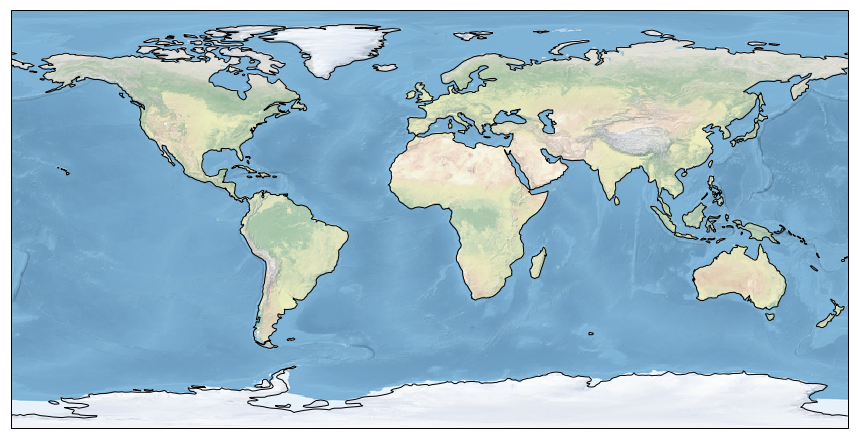

In [2]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global() # Show the whole globe

ax.stock_img()  # Adds a nice background image
ax.coastlines() # Draws coastlines
plt.show()

We can look at the distortion introduced by this projection by plotting "**Tissot's indicatrices**". These show how circles of equal size appear when projected.

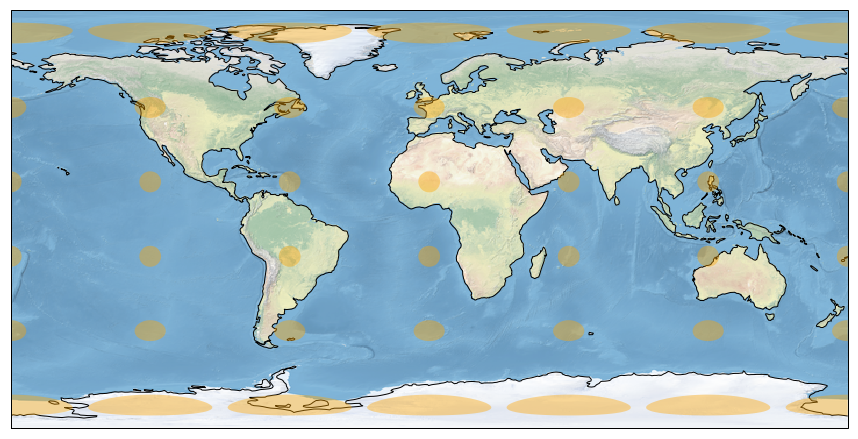

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

This projection does not preserve size/area or shape.

## Mercator projection

(Conformal, ... TODO)

This projection is commonly used by web mapping tools

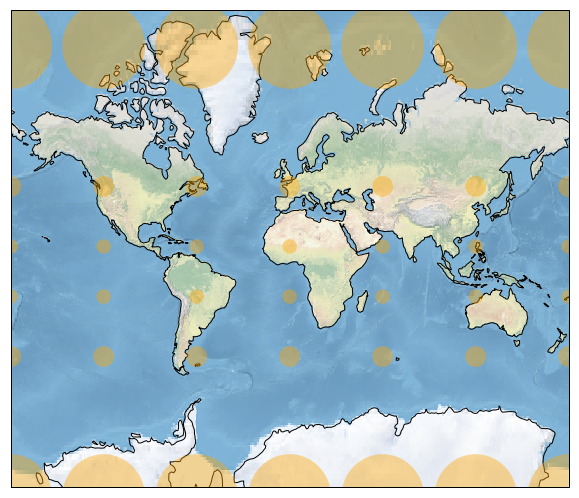

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='orange', alpha=0.4)

plt.show()

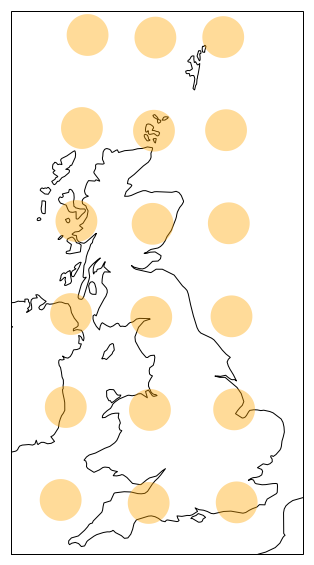

In [5]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.OSGB())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

#ax.stock_img()
ax.coastlines(resolution="50m")

ax.tissot(facecolor='orange', rad_km=50, lons=range(-6,2,3), lats=range(51, 62, 2), alpha=0.4)

plt.show()